In [67]:
import numpy as np
from glob import glob
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit as cfit
from scipy.signal import find_peaks_cwt

from astropy.visualization import ZScaleInterval as Zscale

In [46]:
step_file = glob("*.fits")
step = [_.split("_")[-1][:-5] for _ in step_file]
stepid = [9,13,17,20,15,16,18,19,14,7,2,10,1,8,6,11,5,3,12,4,0]
step = [x for _, x in sorted(zip(stepid, step))]
step_file = [x for _, x in sorted(zip(stepid, step_file))]
print(step)

['uncal', 'groupscale', 'dqinit', 'saturation', 'superbias', 'refpix', 'linearity', 'darkcurrent', 'jump', 'rampfit', 'gainscale', 'rate', 'srctype', 'bkg', 'wavecorrstep', 'flatfieldstep', 'pathlossstep', 'barshadowstep', 'photomstep', 'resamplespecstep', 'extract1dstep']


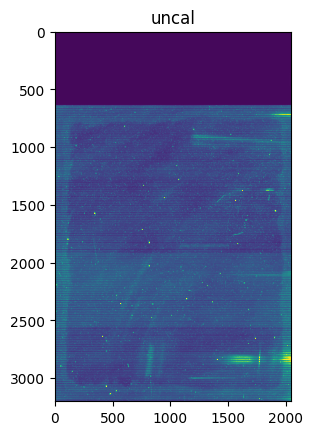

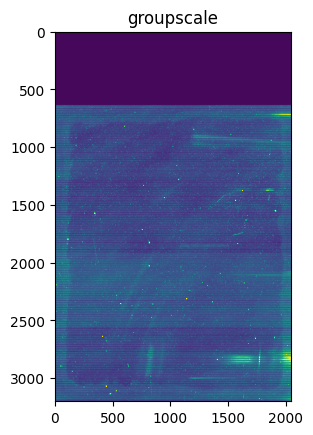

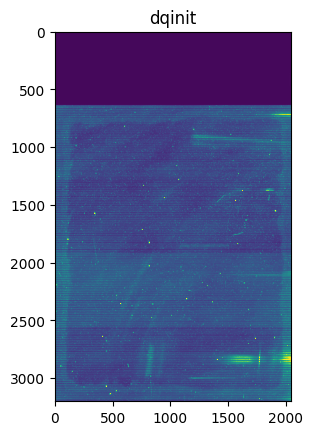

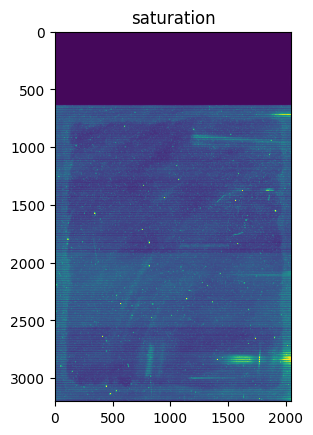

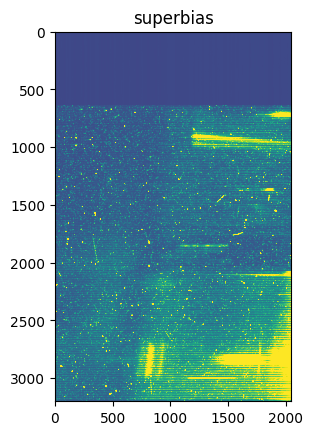

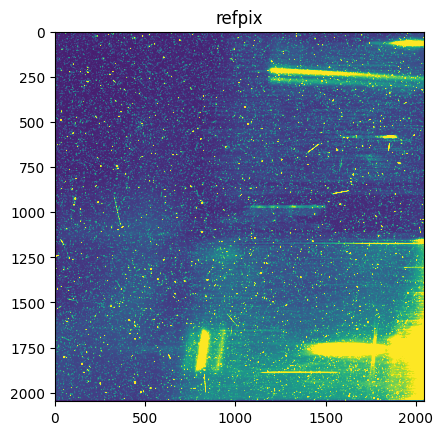

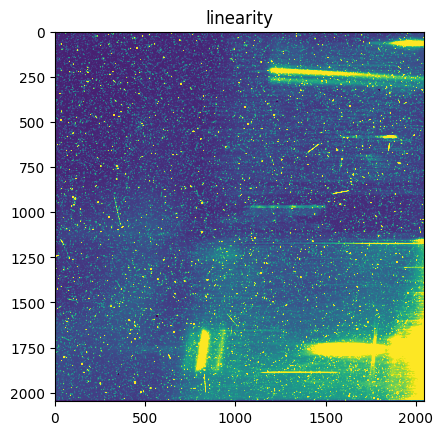

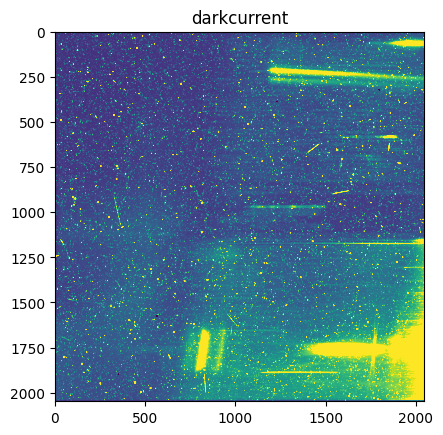

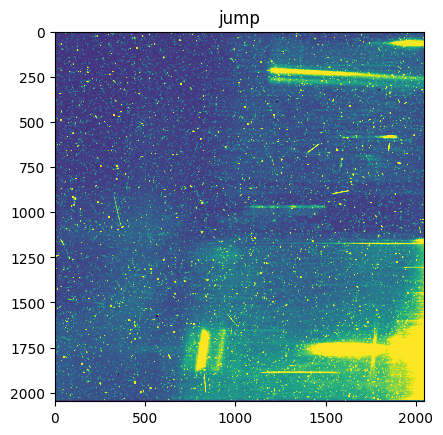

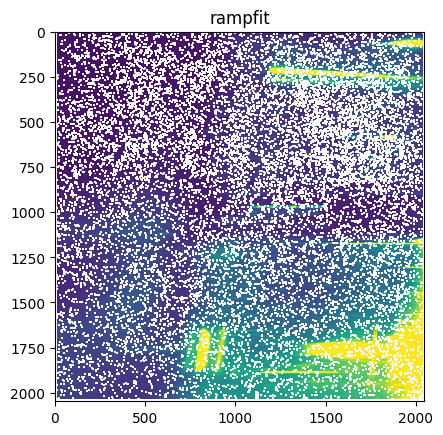

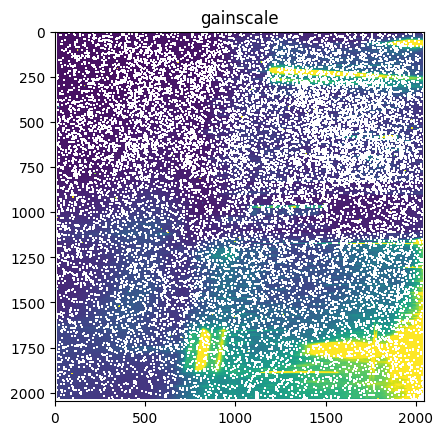

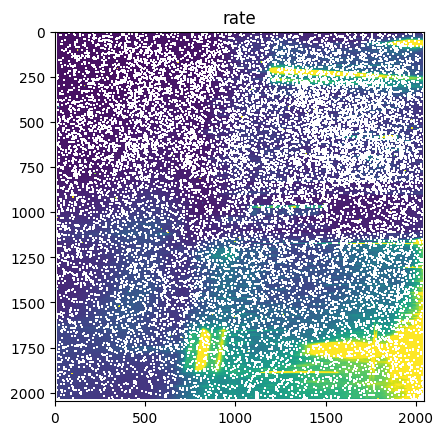

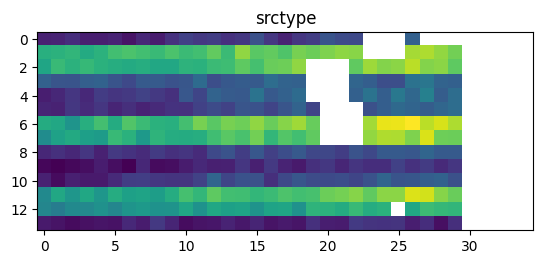

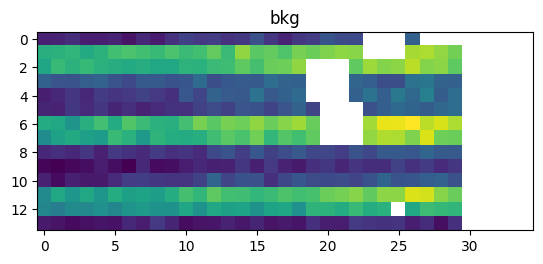

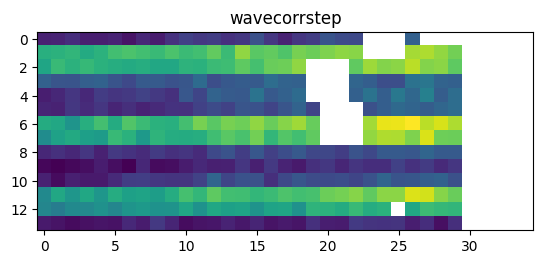

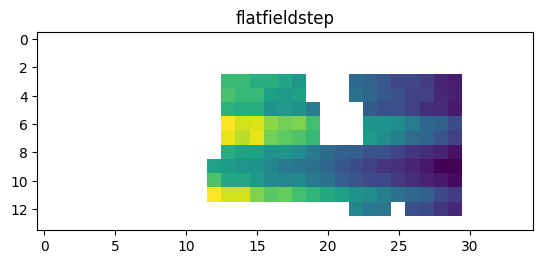

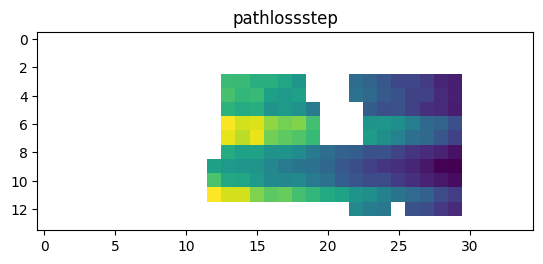

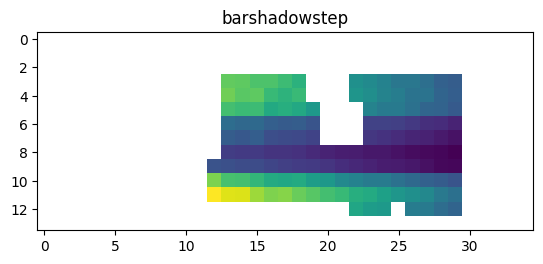

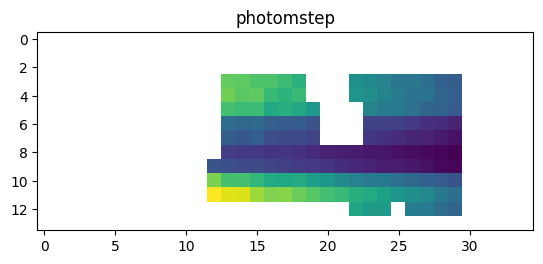

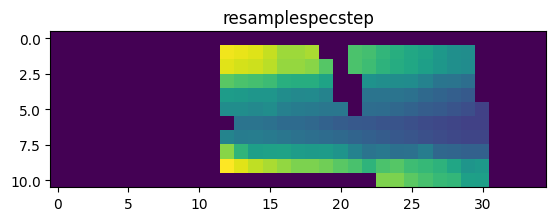

In [70]:
for i,file in enumerate(step_file):
    with fits.open(file) as hdu:
        data = hdu[1].data
        if not hdu[1].name == "SCI":
            continue
        plt.figure()
        if i < 9:
            data = data[0,13,:,:]
        elif i == 9:
            data = data[0,:,:]
        else :
            data = data
            
        vmin,vmax = Zscale().get_limits(data)
        plt.imshow(data,vmin=vmin,vmax=vmax)
        plt.title(step[i])
        plt.show()

In [145]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

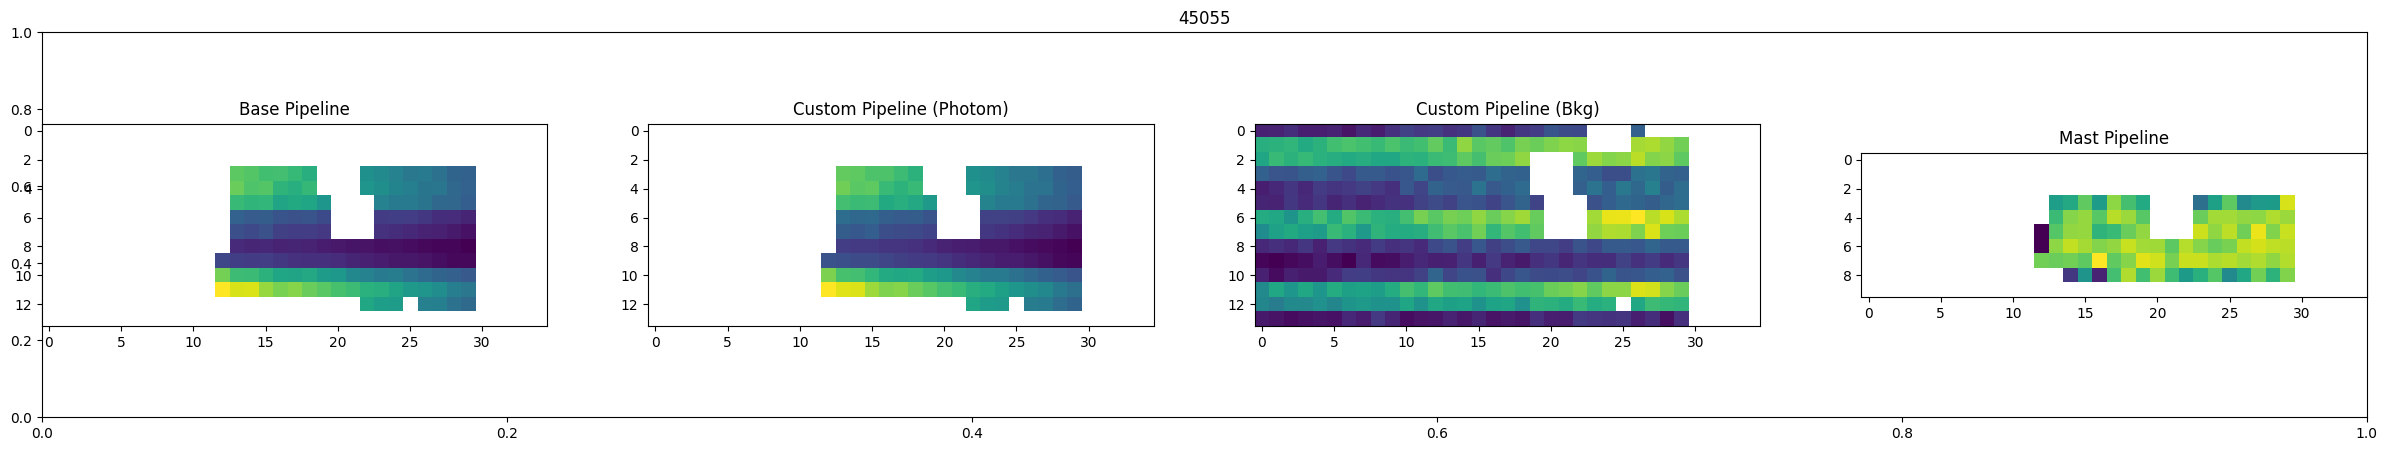

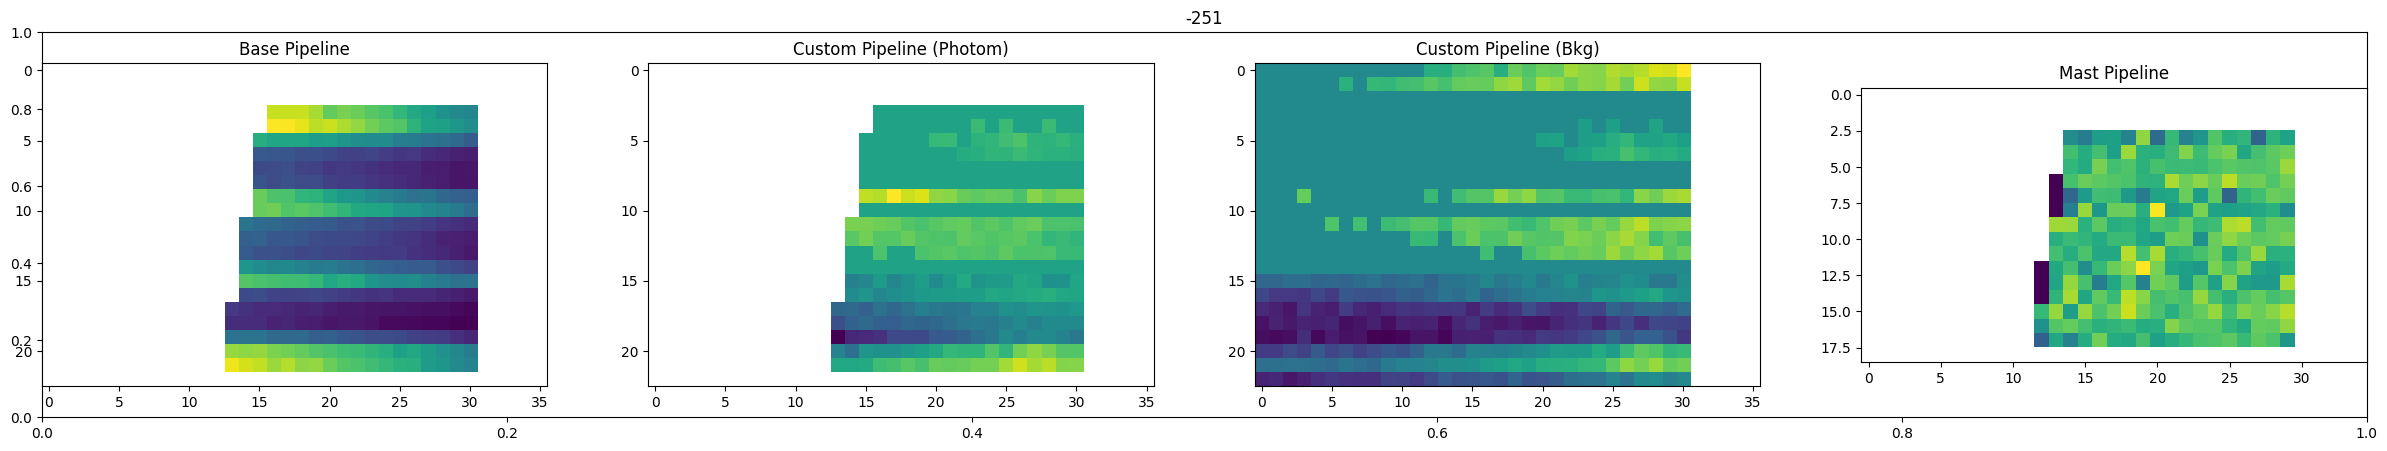

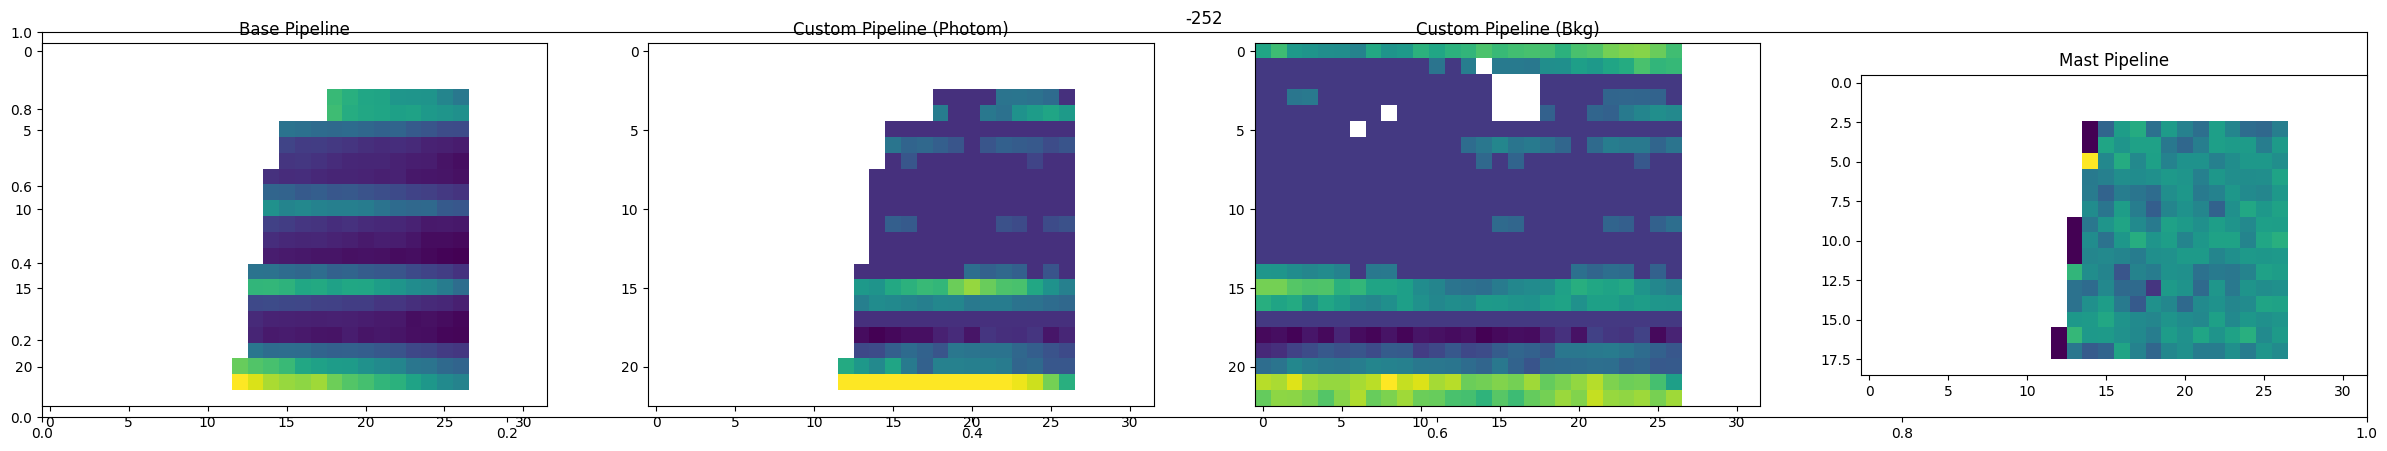

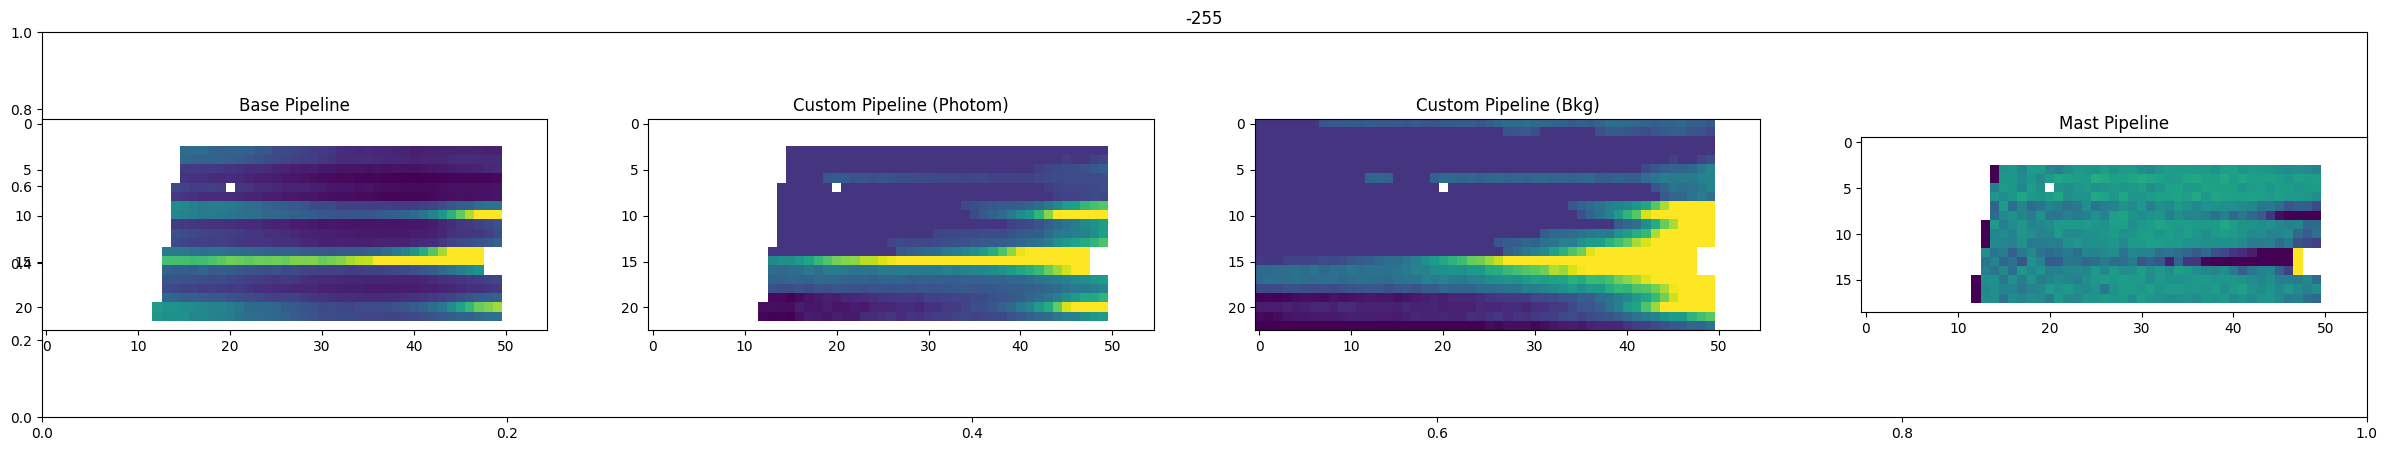

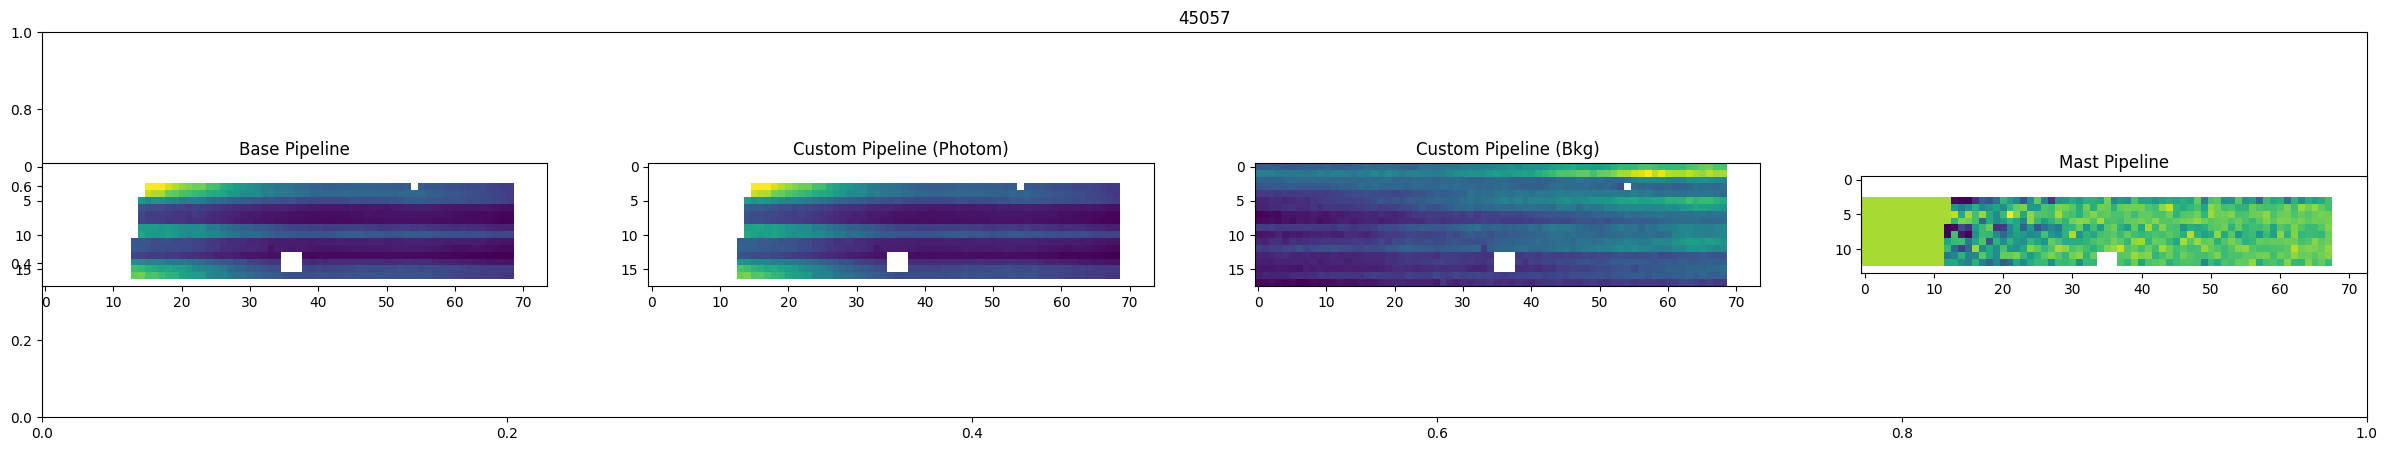

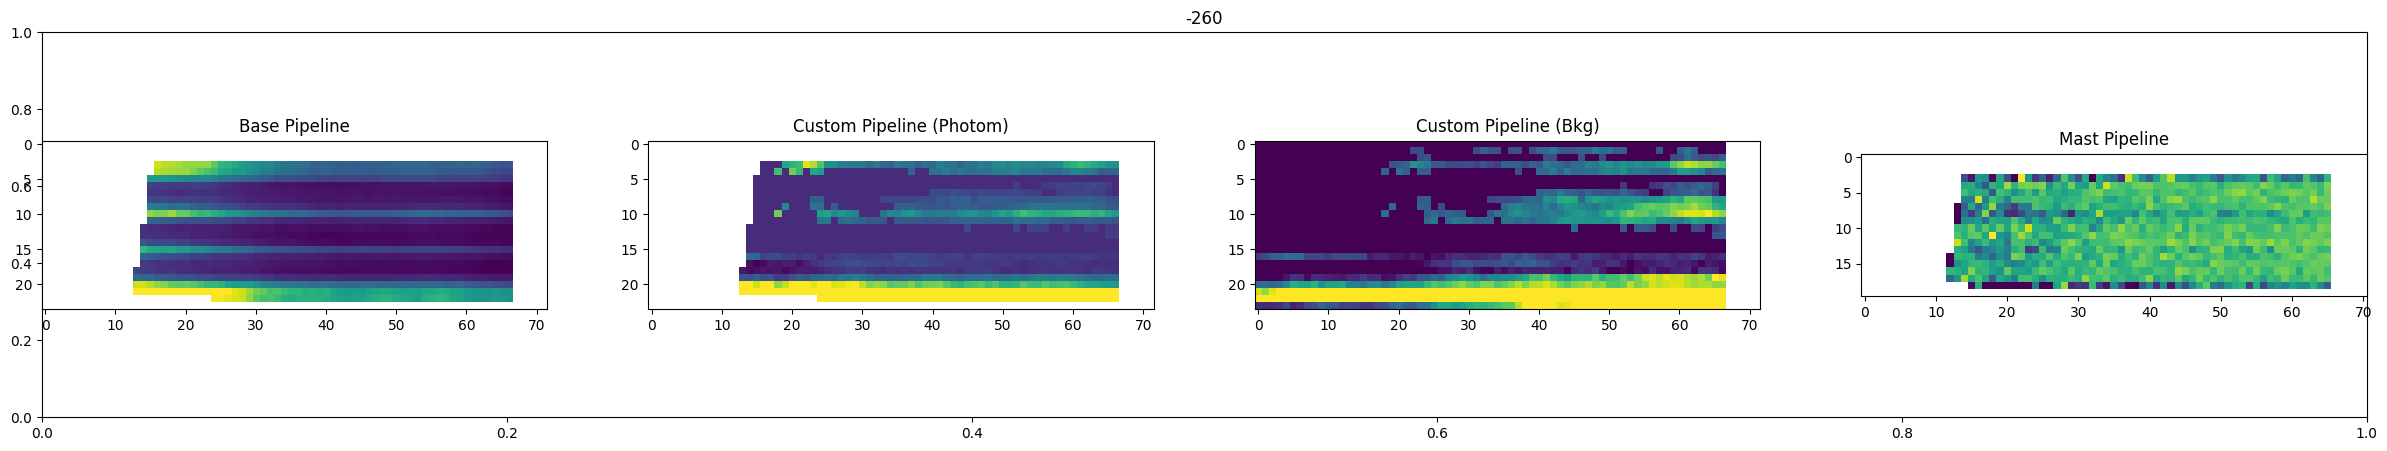

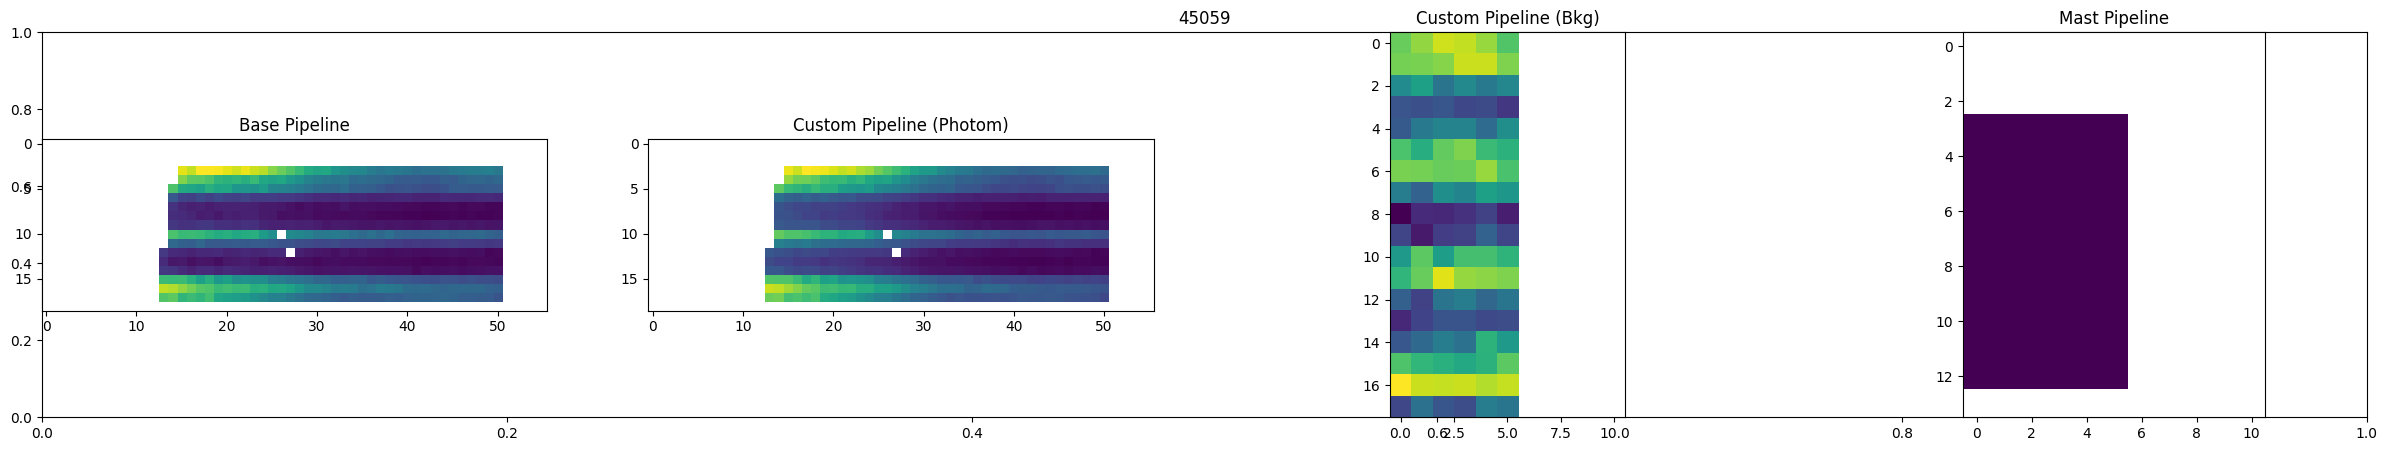

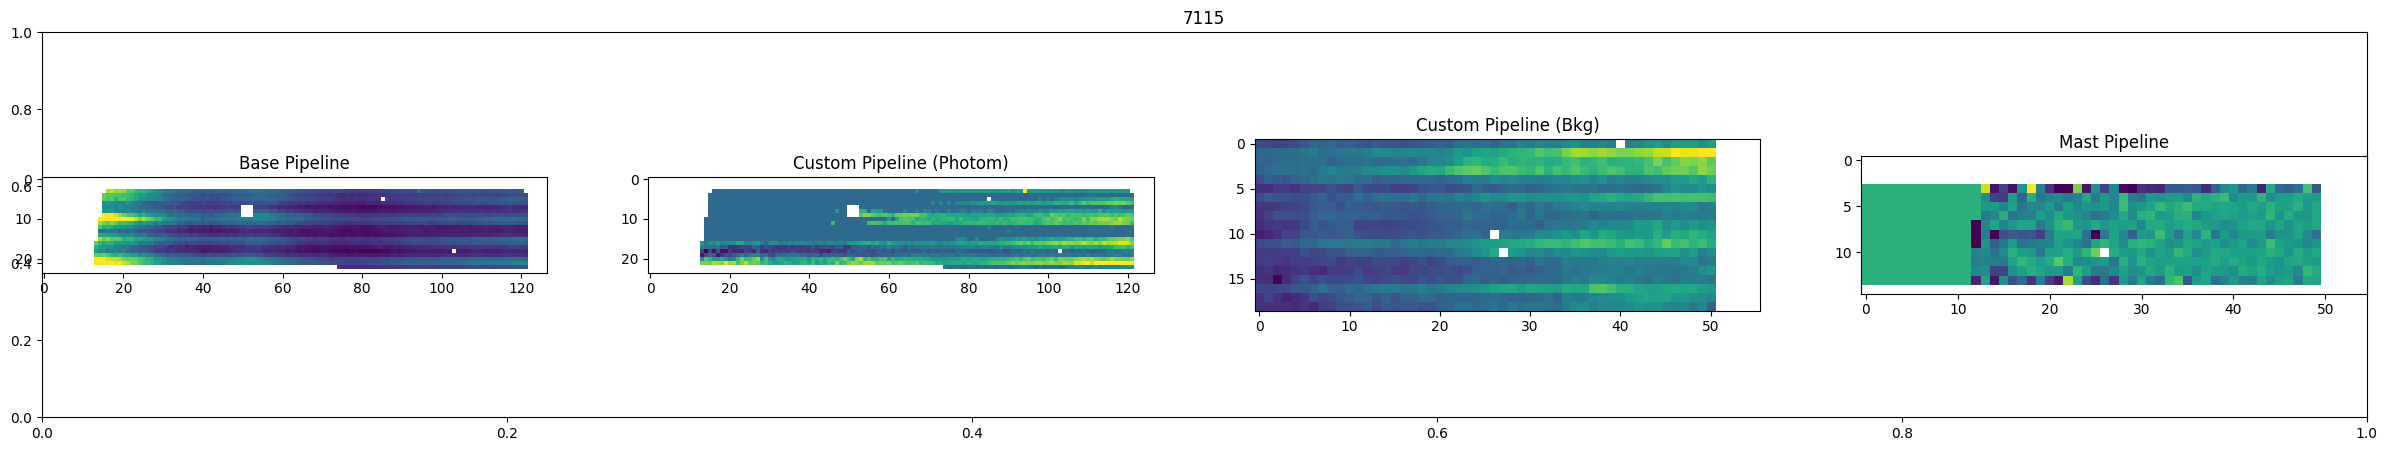

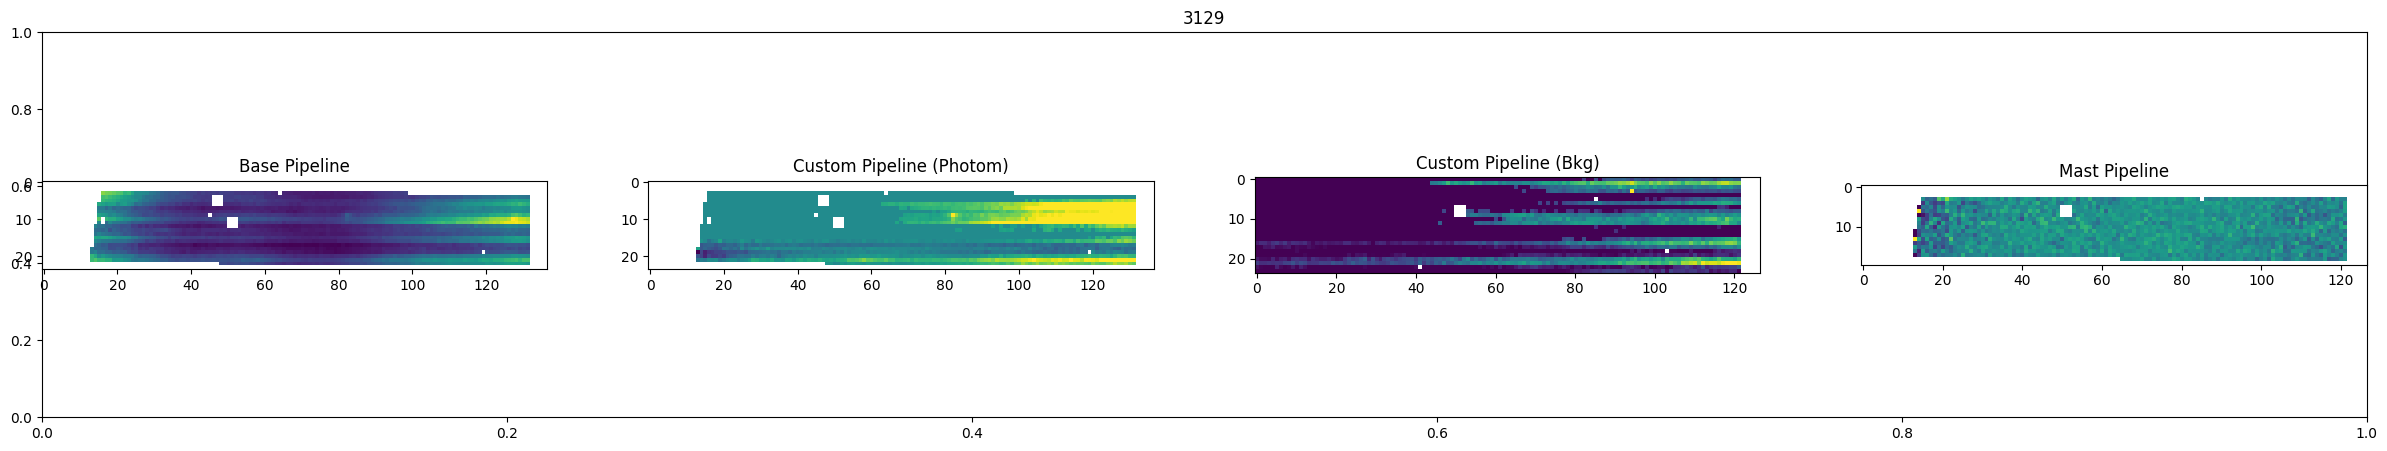

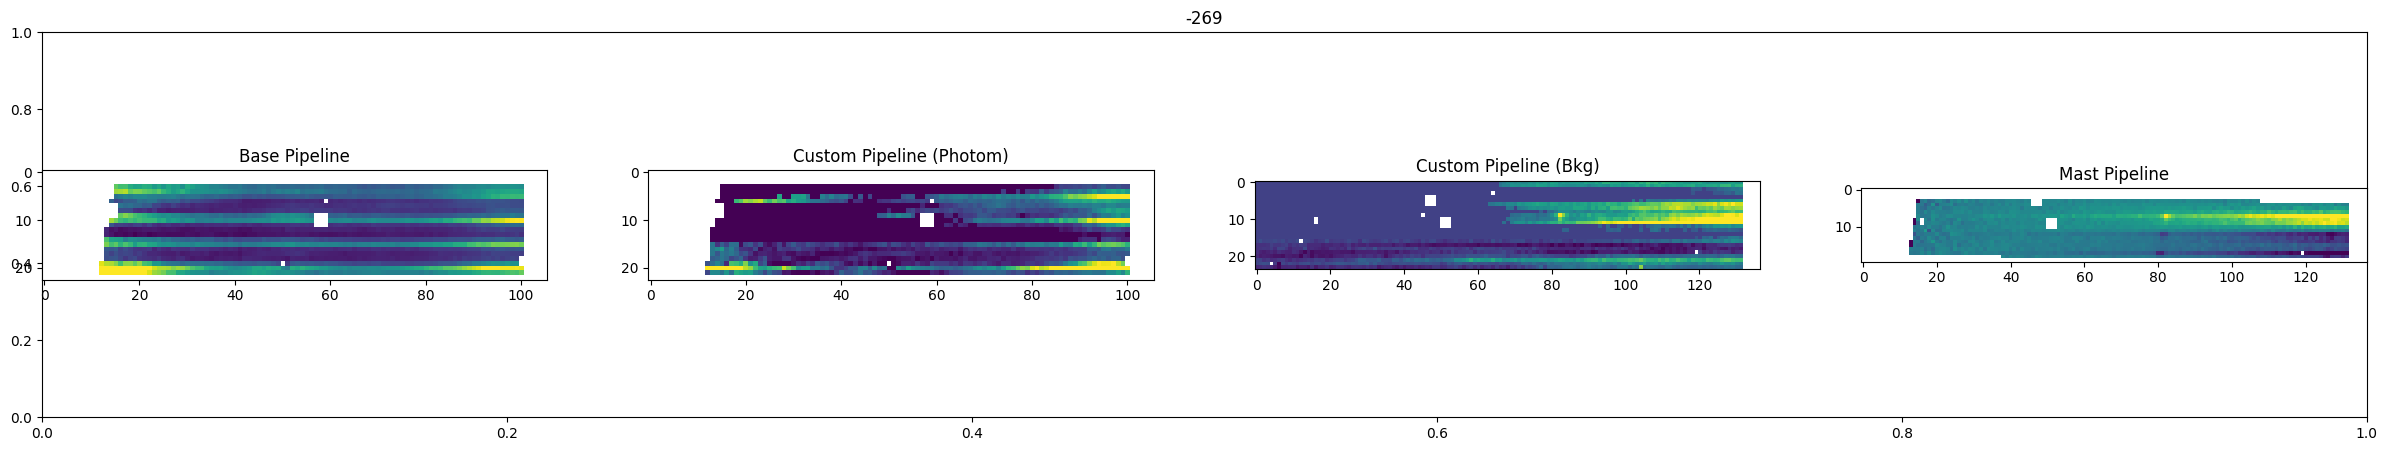

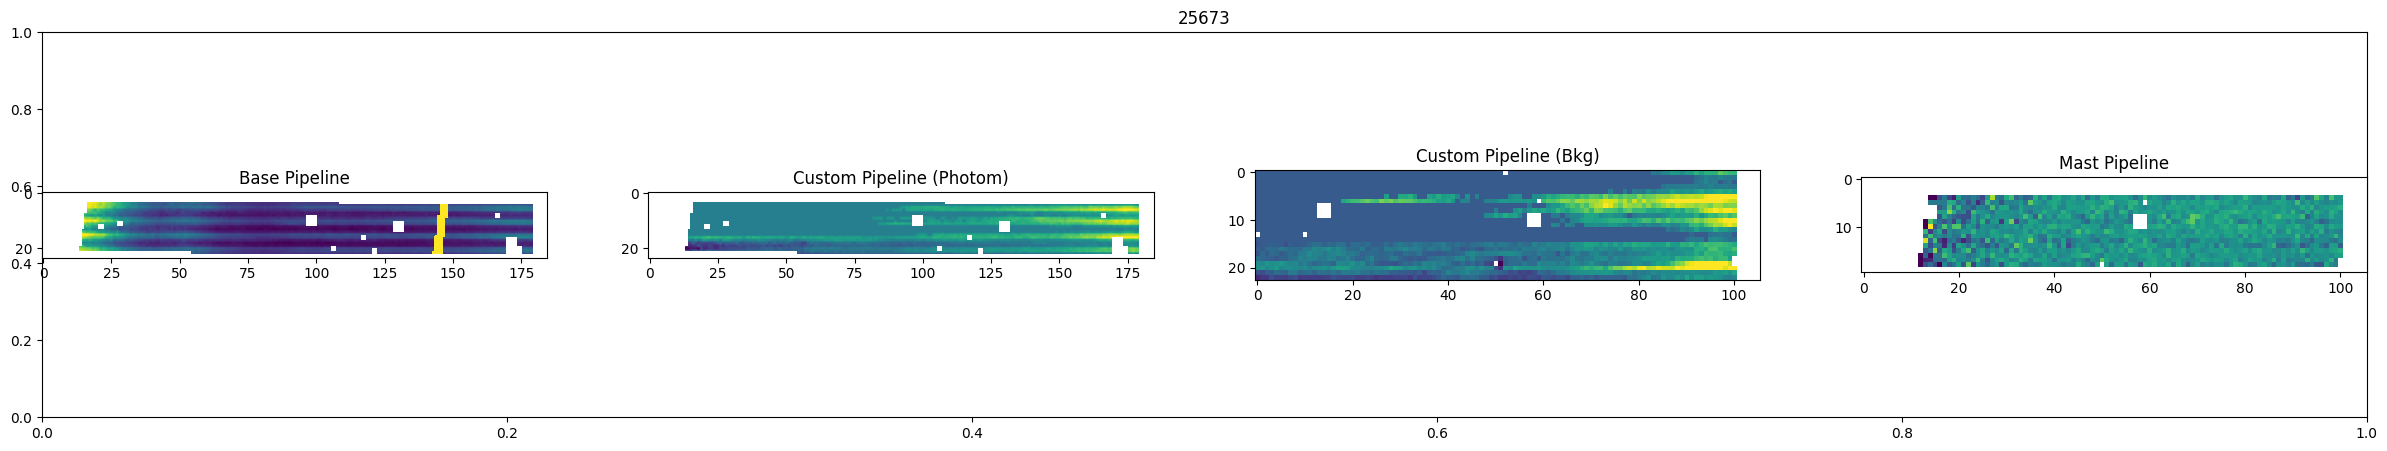

In [144]:
with fits.open('./BasePipeline/jw01345070001_05101_00003_nrs1_cal.fits') as hdul1:
    with fits.open(step_file[-3]) as hdul2:
        with fits.open(step_file[-8]) as hdul3:
            with fits.open('./BasePipeline/jw01345070001_05101_00003_nrs1_cal_MAST.fits') as hdul4:
                n = 0
                for i,hdu in enumerate(hdul1):
                    if not hdu.name == 'SCI':
                        continue
                    if np.all(np.isnan(hdu.data)):
                        continue
                    if n > 10:
                        break
                    n += 1
                    data = hdu.data

                    plt.figure(n,figsize=(30,5))
                    
                    plt.title(hdu.header["SOURCEID"])
                    plt.subplot(1,4,1)
                    plt.title("Base Pipeline")
                    vmin,vmax = Zscale().get_limits(data)
                    plt.imshow(data,vmin=vmin,vmax=vmax,interpolation=None)
                    
                n = 0
                for i,hdu in enumerate(hdul2):
                    if not hdu.name == 'SCI':
                        continue
                    if np.all(np.isnan(hdu.data)):
                        continue
                    if n > 10:
                        break
                    n += 1
                    data = hdu.data

                    plt.figure(n)
                    plt.subplot(1,4,2)
                    plt.title("Custom Pipeline (Photom)")
                    vmin,vmax = Zscale().get_limits(data)
                    plt.imshow(data,vmin=vmin,vmax=vmax,interpolation=None)

                n = 0
                for i,hdu in enumerate(hdul3):
                    if not hdu.name == 'SCI':
                        continue
                    if np.all(np.isnan(hdu.data)):
                        continue
                    if n > 10:
                        break
                    n += 1
                    data = hdu.data

                    plt.figure(n)
                    plt.subplot(1,4,3)
                    plt.title("Custom Pipeline (Bkg)")
                    vmin,vmax = Zscale().get_limits(data)
                    plt.imshow(data,vmin=vmin,vmax=vmax,interpolation=None)

                n = 0
                for i,hdu in enumerate(hdul4):
                    if not hdu.name == 'SCI':
                        continue
                    if np.all(np.isnan(hdu.data)):
                        continue
                    if n > 10:
                        break
                    n += 1
                    data = hdu.data

                    plt.figure(n)
                    plt.subplot(1,4,4)
                    plt.title("Mast Pipeline")
                    vmin,vmax = Zscale().get_limits(data)
                    plt.imshow(data,vmin=vmin,vmax=vmax,interpolation=None)

plt.show()
            

x


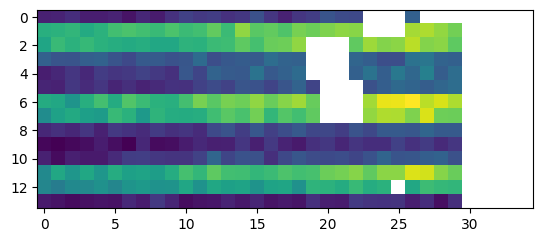

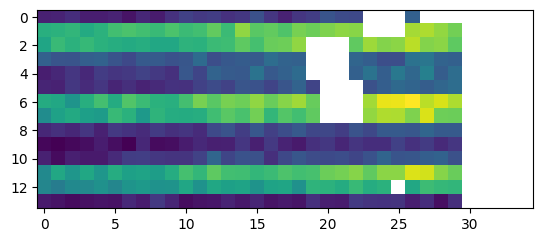

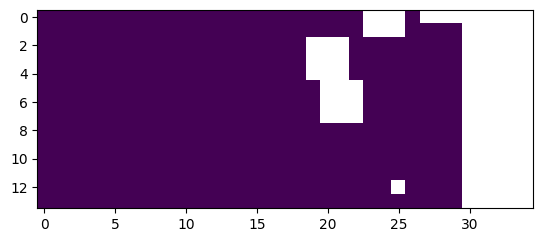

In [76]:
src_f = step_file[12]
bkg_f = step_file[13]
with fits.open(src_f) as hdu:
    src = hdu[1].data
    hdr = hdu[1].header
with fits.open(bkg_f) as hdu:
    bkg = hdu[1].data



print(hdr["SHUTSTA"])


plt.figure()
vmin, vmax = Zscale().get_limits(src)
plt.imshow(src,vmin=vmin,vmax=vmax)
plt.show()

plt.figure()
vmin, vmax = Zscale().get_limits(bkg)
plt.imshow(bkg,vmin=vmin,vmax=vmax)
plt.show()

data = src-bkg  
vmin,vmax = Zscale().get_limits(data)
plt.figure()
plt.imshow(data,vmin=vmin,vmax=vmax)
plt.show()

./Flat/jwst_nirspec_dflat_0001.fits
0 PRIMARY
1 SCI
2 DQ
3 ERR
4 WAVELENGTH
5 FAST_VARIATION
6 DQ_DEF


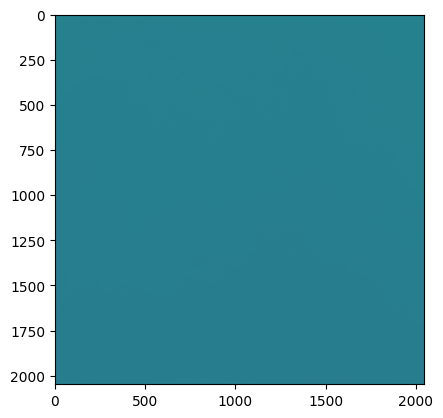

./Flat/jwst_nirspec_dflat_0002.fits
0 PRIMARY
1 SCI
2 DQ
3 ERR
4 WAVELENGTH
5 FAST_VARIATION
6 DQ_DEF


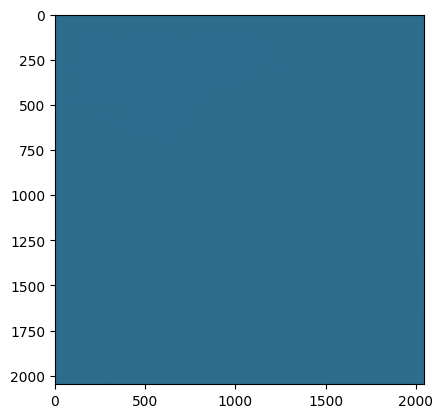

./Flat/jwst_nirspec_fflat_0135.fits
0 PRIMARY
1 SCI
2 DQ
3 ERR
4 WAVELENGTH
5 FAST_VARIATION
6 SCI
7 DQ
8 ERR
9 WAVELENGTH
10 FAST_VARIATION
11 SCI
12 DQ
13 ERR
14 WAVELENGTH
15 FAST_VARIATION
16 SCI
17 DQ
18 ERR
19 WAVELENGTH
20 FAST_VARIATION
21 DQ_DEF


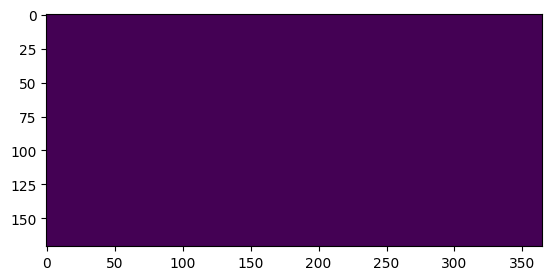

./Flat/jwst_nirspec_sflat_0166.fits
0 PRIMARY
1 SCI
2 DQ
3 ERR
4 WAVELENGTH
5 FAST_VARIATION
6 DQ_DEF


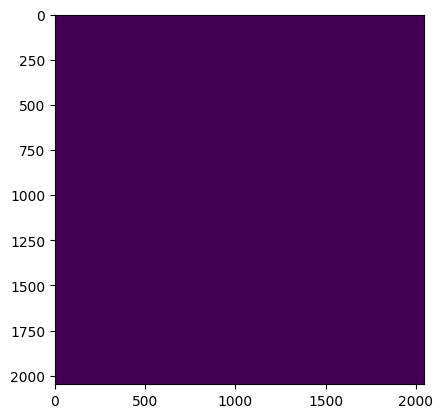

./Flat/jwst_nirspec_sflat_0202.fits
0 PRIMARY
1 SCI
2 DQ
3 ERR
4 WAVELENGTH
5 FAST_VARIATION
6 DQ_DEF


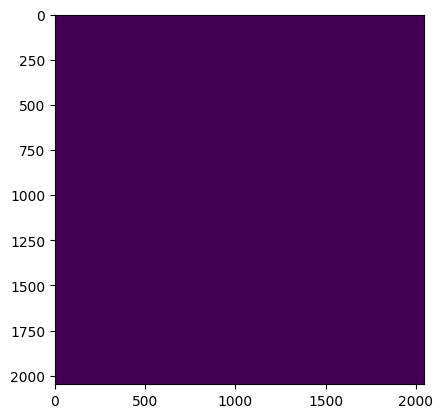

In [95]:
flats = glob("./Flat/*.fits")
for file in flats:
    print(file)
    with fits.open(file) as hdul:
        for i,hdu in enumerate(hdul):
            print(i,hdu.name)
        wave = hdul["WAVELENGTH"]
        sci = hdul["SCI"]
        plt.figure()
        plt.imshow(sci.data[3,:,:])
        plt.show()